In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import re
import seaborn as sns
from collections import Counter
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
%matplotlib inline

RANDOM FOREST

In [4]:
X = np.load('X.npy')
X

array([[ 0.00546968, -2.63575159, -0.08626786, ..., -0.49449405,
        -0.73591438,  3.30735414],
       [ 0.00546968, -2.63538219, -0.08626786, ..., -0.49449405,
        -0.73591438,  3.30735414],
       [ 0.00546968, -2.59997259, -0.08626786, ..., -0.49449405,
        -0.73591438,  3.30735414],
       ...,
       [ 0.99466784,  1.87366874, -0.08626786, ...,  2.02226904,
        -0.73591438, -0.30235649],
       [ 0.99466784,  1.88971124, -0.08626786, ...,  2.02226904,
        -0.73591438, -0.30235649],
       [ 0.99466784,  1.90575374, -0.08626786, ...,  2.02226904,
        -0.73591438, -0.30235649]])

In [5]:
y = np.load('y.npy')
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [57]:
y = y.reshape(-1)
y.shape

(1709857,)

In [7]:
np.min(y), np.max(y), np.unique(y)

(0,
 56,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
skf = StratifiedKFold(n_splits=2)

In [10]:
rfc = RandomForestClassifier()

In [11]:
param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto'],
    'max_depth' : [None],
    'criterion' :['gini']
}
random_search = RandomizedSearchCV(rfc, param_grid, cv=skf, verbose=2, random_state=42, n_jobs = -1)

In [12]:
random_search.fit(X_train, y_train)
print(random_search.cv_results_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'mean_fit_time': array([85.52497005]), 'std_fit_time': array([0.69346094]), 'mean_score_time': array([29.34886956]), 'std_score_time': array([0.04427743]), 'param_n_estimators': masked_array(data=[100],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[None],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 100, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}], 'split0_test_score': array([0.92673072]), 'split1_test_score': array([0.92549073]), 'mean_test_score': array([0.92611072]), 'std_test_score': array([0.00062]), 'rank_test_score': array([1], dtype=int32)}


In [13]:
random_search.best_score_

0.9261107239457991

In [14]:
classifier = random_search.best_estimator_

In [15]:
classifier.score(X_train, y_train)

0.9999724287512981

In [16]:
classifier.score(X_test, y_test)

0.957269406072232

In [17]:
random_search.scores_

AttributeError: 'RandomizedSearchCV' object has no attribute 'scores_'

[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=100; total time= 1.9min
[CV] END criterion=gini, max_depth=None, max_features=auto, n_estimators=100; total time= 1.9min


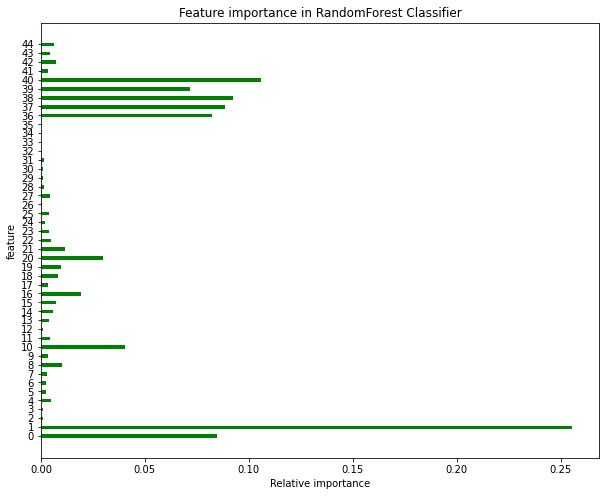

<Figure size 360x360 with 0 Axes>

In [29]:
#modelname.feature_importance_
features = classifier.feature_importances_
#plot
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(len(features)) # the x locations for the groups
ax.barh(ind, features, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(range(len(features)), minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature")
plt.figure(figsize=(5,5))
fig.set_size_inches(10, 8, forward=True)

In [49]:
X_clean = X.copy()

In [54]:
X_clean.shape

(1709857, 45)

In [51]:
features.shape

(45,)

In [34]:
X_mock = X_clean.copy()

In [35]:
X_mock = np.delete(X_clean, 5, 1)
X_mock.shape

(1709857, 44)

In [38]:
features[0], features[1], features[2]

(0.08455971370712748, 0.25569036308079385, 0.0008847651317850527)

In [40]:
features[20]

0.029621723015000694

In [39]:
len(features)

45

In [53]:
deletable = []
for i in range(0, len(features)):
    if features[i] < 0.025:
        deletable.append(i)
#         X_clean = np.delete(X_clean, i, 1)
deletable

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 41,
 42,
 43,
 44]

In [55]:
X_clean = np.delete(X_clean, deletable, 1)

In [56]:
X_clean.shape

(1709857, 9)

In [58]:
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y, test_size=0.3, random_state=42)

In [59]:
skf_clean = StratifiedKFold(n_splits=2)

In [60]:
rfc_clean = RandomForestClassifier()

In [62]:
random_search_clean = RandomizedSearchCV(rfc_clean, param_grid, cv=skf_clean, verbose=2, random_state=42, n_jobs = -1)

In [63]:
random_search_clean.fit(X_clean_train, y_clean_train)
print(random_search.cv_results_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [64]:
random_search_clean.best_score_

0.9709958817693625

In [65]:
classifier_clean = random_search_clean.best_estimator_

In [66]:
classifier_clean.score(X_clean_train, y_clean_train)

0.9990308288335106

In [67]:
classifier_clean.score(X_clean_test, y_clean_test)

0.982327987866453

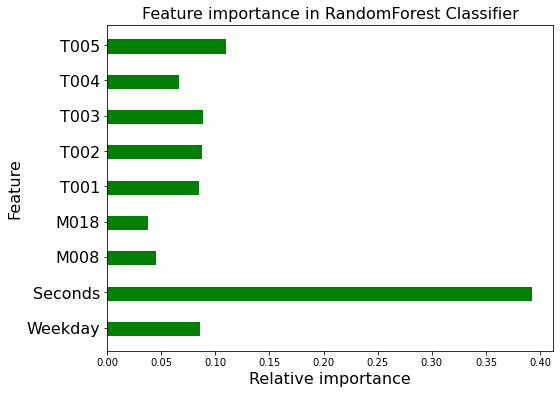

<Figure size 360x360 with 0 Axes>

In [75]:
#modelname.feature_importance_
features_clean = classifier_clean.feature_importances_
ylabels = ['Weekday', 'Seconds', 'M008', 'M018', 'T001', 'T002', 'T003', 'T004', 'T005']
#plot
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(len(features_clean)) # the x locations for the groups
ax.barh(ind, features_clean, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(ylabels, minor=False, fontsize=16)
plt.title("Feature importance in RandomForest Classifier", fontsize=16)
plt.xlabel("Relative importance", fontsize=16)
plt.ylabel("Feature", fontsize=16)
plt.figure(figsize=(5,5))
fig.set_size_inches(8, 6, forward=True)